<a href="https://colab.research.google.com/github/suy379/21_stat_seminar/blob/main/R_practice2(tidyr).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling (tidyr)

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Example datasets

In [2]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [3]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [4]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [5]:
table4a # N. cases

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [6]:
table4b # N. population

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


## pivot_longer() 

One variable might be spread across multiple columns

Apply pivot_longer() to table4a

In [7]:
table4a #현재 country별 1999년, 2000년의 case 수를 담고있음.

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [8]:
table4a %>% 
    #country별로 year, case 수라는 컬럼을 새로 만듦. 
    #그래서 원래 1999, 2000이라는 컬럼의 이름을 -> year로, 그 안에 들어갈 내용은 -> cases로 함.
    pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


apply it to table4b

In [9]:
table4b #table4a와 비슷하게, country별 1999, 2000년의 인구수 정보를 담고있음.

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


In [10]:
table4b %>% 
    #마찬가지로 1999, 2000-> 컬럼 year로, 안에 들어갈 내용은 -> pop으로 함.
    pivot_longer(c('1999','2000'), names_to='year', values_to='pop')

country,year,pop
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


### Join two tables
- left_join, right_join

In [11]:
tidy4a <- table4a %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")

left_join(tidy4a, tidy4b)

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [12]:
right_join(tidy4a, tidy4b)

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Q: What is right_join? try ?right_join and study join methods

## Pivot_wider()

One observation might be scattered across multiple rows

In [13]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [14]:
#앞의 table2를 변형하여, type컬럼 내 case, population를 새로운 컬럼명으로 하고
#그 값을 count 컬럼에서 가져옴.
table2 %>% pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Separating and Uniting 

## separate()

One column contains two variables 

In [15]:
table3 

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [ ]:
#rate 컬럼을 case, population으로 나누기
table3 %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [18]:
#sep 옵션 사용 가능. 여기선 rate에 문자 '/'가 있어서 '/' 기준으로 나눈다는 의미
#문자가 여러개일 때 사용하면 좋겠지?
table3 %>% separate(rate, into = c("cases", "population"), sep='/')

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [16]:
#이렇게만 하면 cases, population이 chr로 되어있으므로, 숫자로 변경
table3 %>% separate(rate, into = c("cases", "population")) %>%
mutate(cases = as.numeric(cases), population = as.numeric(population))

country,year,cases,population
<chr>,<int>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## unite()

Single variable is spread across multiple columns
- 연산자를 이용해 새로운 컬럼 생성

In [19]:
table5

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


In [ ]:
table5 %>% 
#new라는 컬럼 생성: century, year 합침(공백x)
  unite(new, century, year, sep = "")


country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [20]:
table5 %>% 
#new라는 컬럼 생성: century, year 합침(문자 *로 연결)
  unite(new, century, year, sep = "*")

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,19*99,745/19987071
Afghanistan,20*00,2666/20595360
Brazil,19*99,37737/172006362
Brazil,20*00,80488/174504898
China,19*99,212258/1272915272
China,20*00,213766/1280428583


# Functional Programming

In [21]:
df <- tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-1.2710413,-0.8580704,-0.63617056,-1.8304846
0.8198179,0.6045496,-0.74747900,-1.1758803
-0.2939266,-1.5919547,0.61410495,-0.3162020
-1.4957052,0.8565168,0.44786004,-0.7330805
0.2819272,0.4436678,1.96203322,0.2403147
0.3886581,-1.0889072,-0.06204528,1.3579924
0.3762756,-0.6888189,1.09930841,-0.9932850
-1.0285255,1.4737447,-0.09906372,0.4972906
0.6878300,-0.1342204,-0.65498938,-0.7963976


In [22]:
median(df$a)
#> [1] -0.2457625
median(df$b)
#> [1] -0.2873072
median(df$c)
#> [1] -0.05669771
median(df$d)
#> [1] 0.1442633

[1] 0.3291014

[1] -0.3568937

[1] -0.0805545

[1] -0.7647391

### for loop 이용
-  df의 각 열별 중위값을 넣은 output 벡터 만들기


In [33]:
output <- vector("double", ncol(df))
output

[1] 0 0 0 0

In [28]:
output <- vector("double", ncol(df))  # 1. output(df의 컬럼 수만큼 있음. 여기선 4)
for (i in 1:ncol(df)) {            # 2. sequence
  output[[i]] <- median(df[[i]])      # 3. body
}

output

[1]  0.3291014 -0.3568937 -0.0805545 -0.7647391

In [30]:
class(output)

[1] "numeric"

In [31]:
## c를 사용하는 건 시간이 오래걸려서 비추천 ##
output <- c() #그냥 이렇게 기본형태 만들어도 됨.
for (i in seq_along(df)) {            # 2. sequence
  output <- c( output, median(df[[i]]) )      # 3. body
}
output


[1]  0.3291014 -0.3568937 -0.0805545 -0.7647391

In [32]:
install.packages("rbenchmark")
library(rbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### 직접 function 만들기

In [34]:
#두 함수는 같은 기능
simple1 <- function(n) {
  output <- vector("double", n)
  for(i in 1:n) 
    output[i] = i
  return(output)
} 

simple2 <- function(n) {
  output <- c()
  for(i in 1:n) 
    output = c(output, i)
  return(output)
} 


In [37]:
simple1(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [36]:
simple2(3)

[1] 1 2 3

In [38]:
benchmark("fc1"=simple1(1000),
          "fc2"=simple2(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))
          ## 결과를 보면 시간이 fc1이 훨씬 더 빠름. 그래서 fc2처럼 c()를 이용해서 만드는 건 비효율적임

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.006,100
2,fc2,0.211,100


## for_loops vs functional

Possible to wrap up for loops in a function


In [ ]:
col_mean <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- mean(df[[i]])
  }
  output
}

col_median <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- median(df[[i]])
  }
  output
}

col_sd <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- sd(df[[i]])
  }
  output
}

col_mean(df)

[1] -0.084639104 -0.002400303 -0.030917685 -0.083247511

You can make function as a variable

In [ ]:
col_summary <- function(df, fun) {
  out <- vector("double", length(df))
  for (i in seq_along(df)) {
    out[i] <- fun(df[[i]])
  }
  out
}
col_summary(df, median)


[1]  0.42390995  0.02690741 -0.08069307  0.04684442

## The map function (purrr)

the purrr package provides a family of functions for looping patterns over a vector

remind apply()

In [39]:
str(df)

tibble [10 × 4] (S3: tbl_df/tbl/data.frame)
 $ a: num [1:10] -1.271 0.82 -0.294 -1.496 0.282 ...
 $ b: num [1:10] -0.858 0.605 -1.592 0.857 0.444 ...
 $ c: num [1:10] -0.636 -0.747 0.614 0.448 1.962 ...
 $ d: num [1:10] -1.83 -1.176 -0.316 -0.733 0.24 ...


In [40]:
#각 컬럼별 mean
df %>% map_dbl(mean)

a          b          c          d 
-0.1101609 -0.1563060  0.1340324 -0.4562863

In [41]:
#각 컬럼멸 median
df %>% map_dbl(median)
## 이뿐만 아니라, map_dbl(function)을 써서 다양한 값을 도출가능.

a          b          c          d 
 0.3291014 -0.3568937 -0.0805545 -0.7647391

In [44]:
#각 컬럼별 mean 계산
df %>% map(~mean(.)) #모든 컬럼에 대해(.) mean 

$a
[1] -0.1101609

$b
[1] -0.156306

$c
[1] 0.1340324

$d
[1] -0.4562863

In [45]:
df %>% map_dbl(~mean(.)) #벡터 형태 반환 

a          b          c          d 
-0.1101609 -0.1563060  0.1340324 -0.4562863

In [46]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [47]:
mtcars %>% 
#cyl 컬럼의 값에 따라 mtcars 데이터를 나눔.
  split(.$cyl) 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


You can define a function in map

In [48]:
#이렇게 나뉜 데이터들에 각각 회귀모델을 적용가능!
mtcars %>% 
  split(.$cyl) %>% 
  map(function(df) lm(mpg ~ wt, data = df))


$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [50]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}
mtcars %>% 
  split(.$cyl) %>% 
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [49]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .))


$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



## Extract Component

In [51]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary)


$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1513 -1.9795 -0.6272  1.9299  5.2523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   39.571      4.347   9.104 7.77e-06 ***
wt            -5.647      1.850  -3.052   0.0137 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.332 on 9 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.454 
F-statistic: 9.316 on 1 and 9 DF,  p-value: 0.01374


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
     Mazda RX4  Mazda RX4 Wag Hornet 4 Drive        Valiant       Merc 280 
       -0.1250         0.5840         1.9292        -0.6897         0.3547 
     Merc 280C   Ferrari Dino 
       -1.0453        -1.0080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   28.409      4.184   6.789  0.00105 **
wt            -2.780      1.335  -2.083  0.09176 . 
---
Signif.

In [52]:
#위의 결과에서 R^2만 뽑기 
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) %>% 
  #cyl이 4, 6, 8일 때의 R^2
  map_dbl('r.squared')


4         6         8 
0.5086326 0.4645102 0.4229655

You can also use an integer to select elements by position

In [53]:
x <- list(list(1, 2, 3), list(4, 5, 6), list(7, 8, 9))
x %>% map_dbl(2)
#> [1] 2 5 8
x

[1] 2 5 8

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2

[[1]][[3]]
[1] 3


[[2]]
[[2]][[1]]
[1] 4

[[2]][[2]]
[1] 5

[[2]][[3]]
[1] 6


[[3]]
[[3]][[1]]
[1] 7

[[3]][[2]]
[1] 8

[[3]][[3]]
[1] 9

Functional Programming is memory efficient by not saving internal calculations. Easier to understand if you get used to it. 

Is it fater as well? 

In [54]:
n_len = 10

In [55]:
rep(10,n_len) %>% map(~rnorm(.))

[[1]]
 [1]  0.63911394 -0.35278374  0.93650554 -0.33114792 -0.75197466 -0.80161157
 [7]  0.45099461 -1.57980635  0.26364088  0.01451584

[[2]]
 [1]  0.58998377 -0.99113008 -0.01521778  0.69672561  0.41219107 -1.07155166
 [7]  1.55420896  0.12622147 -0.48583918 -0.54456889

[[3]]
 [1] -1.99249355  0.02348478 -1.51735236 -1.23074472 -1.30832537  0.97601025
 [7] -1.41140443 -0.35588309  0.99868137 -0.14604061

[[4]]
 [1] -1.5566391  2.1812572  0.4483659 -1.1959081 -1.3840769 -1.0273182
 [7]  0.5018079  1.6076203 -0.6892737  0.7416688

[[5]]
 [1] -0.54154356 -0.88930153 -0.82981644 -2.54811163  1.96632614  0.86355602
 [7] -1.07016344  0.02146838  0.09417852 -2.08414751

[[6]]
 [1]  0.03905932  0.67490242 -0.12096594  1.03158643 -1.26950002 -1.84739156
 [7] -2.35451670 -0.65407161 -0.78239573  0.63711764

[[7]]
 [1]  1.80704519 -2.01860235 -0.01583301 -0.65810004 -2.08347124  0.85521838
 [7]  0.27229387  0.30797952 -3.03507357  0.66321657

[[8]]
 [1]  3.0034623  0.1549633  0.9213721 -0.1432142  1.2091758 -0.3631065
 [7] -0.3904290  0.2997885 -0.6320264  1.4705760

[[9]]
 [1] -0.48946476  1.05061230  0.07837163  0.09619219 -0.08360030  0.57688069
 [7] -1.21381108  0.24879377 -0.16288626  1.90368750

[[10]]
 [1] -0.93386628 -0.06909597  1.16443020 -0.19443649  0.23618915  0.69669630
 [7]  2.43932801  0.48502329  0.73485693 -1.24343425

In [ ]:
df2 <- vector(mode = "list", length = n_len)
for (i in 1:n_len)
  df2[[i]] <- rnorm(10)
df2

[[1]]
 [1]  0.52743505 -0.90886269  1.03574372  0.22652611 -0.88963669  0.72808485
 [7]  0.07468877  0.93831708 -1.21445971  0.69366390

[[2]]
 [1] -0.8991981  1.3794527 -0.1630155 -0.8610476  1.3932738  1.8208133
 [7] -1.7513283  1.3299391 -2.1452046  1.9997852

[[3]]
 [1]  0.3140859  0.9923112 -0.1759633 -1.4956647 -0.5351259 -0.5675641
 [7]  1.6307535  0.1683051  1.9075010 -0.4206986

[[4]]
 [1] -0.6201247  1.6502121 -0.1464198  0.8662909  0.1941911 -0.9192513
 [7]  0.1374188  1.3628337  1.4666813 -1.4221725

[[5]]
 [1] -1.4378453 -0.1232300 -0.7473429  1.7292908 -1.8621292 -1.3026652
 [7] -0.4851520  0.7450059  2.5731727  0.2617644

[[6]]
 [1]  0.9918919  0.8194098  0.6537751  1.5731232  2.5049935 -0.8119337
 [7]  0.1107102  0.7552333 -1.4451167  0.9113512

[[7]]
 [1] -1.7480207 -0.4536697 -0.5805534 -0.2680587 -0.9421824  0.5934837
 [7]  0.1768781  0.8551443 -0.2033591  1.2810124

[[8]]
 [1] -0.9987953 -0.1471029  1.7755825 -0.5204478  1.3944090 -0.5084039
 [7] -0.9704586  1.9228476 -0.1769407 -2.2861610

[[9]]
 [1] -0.6937698 -0.1350995 -0.3956007  0.5873083  0.2357904  0.1712018
 [7]  0.5829747  1.2848006  1.3651692 -0.7767127

[[10]]
 [1] -0.32778981  0.38849485 -0.07921878  1.87462633 -0.95527718 -1.03441315
 [7] -1.18534636 -0.09218413 -1.07912081  1.97505778

In [ ]:
gen1 <- function(n_len) {
  rep(10,n_len) %>% map(~rnorm(.))
}

In [ ]:
gen2 <- function(n_len) {
  df2 <- vector(mode = "list", length = n_len)
  for (i in 1:n_len)
    df2[[i]] <- rnorm(10)
  df2
}

In [ ]:
gen3 <- function(n_len) {
  lapply(rep(10,n_len), rnorm )
}

In [ ]:
gen1(5)

[[1]]
 [1] -0.49712861  0.05091309 -0.44606287  1.29916012 -0.75930663 -0.74310399
 [7]  0.07484685  1.39902817  0.59695194  0.90814706

[[2]]
 [1]  0.7431012 -0.8041339  0.3037484  0.1008956  0.5447449 -0.7322523
 [7] -0.1037679 -1.6007440 -1.0930806  1.2337762

[[3]]
 [1]  0.6262720  0.5761060  1.0666356  0.2129407  0.7748447  0.1972533
 [7] -1.1542661 -0.3049017  0.3102966  0.8163364

[[4]]
 [1] -0.61274376  0.13759164 -0.62081090  0.17898726  0.95804661  2.60610471
 [7] -0.47801363 -0.04396463 -0.25997366  0.22741581

[[5]]
 [1]  0.1387129 -0.4904658  1.0748251 -0.2250626  0.4380025  0.2567294
 [7]  0.1306778 -1.3091760  1.9178766 -0.9971336

In [ ]:
benchmark("fc1"=gen1(1000),
          "fc2"=gen2(1000),
          "fc3"=gen3(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.577,100
2,fc2,0.405,100
3,fc3,0.423,100


# Something useful
- boxplot vs. violinplot
- pie chart
- 효과적인 2D visualization with t-SNE & UMAP --> 2차원 데이터의 클러스터들을 효과적으로 표현할 수 있는 방법. 최근 PCA보다 자주 쓰이는 듯.

In [56]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


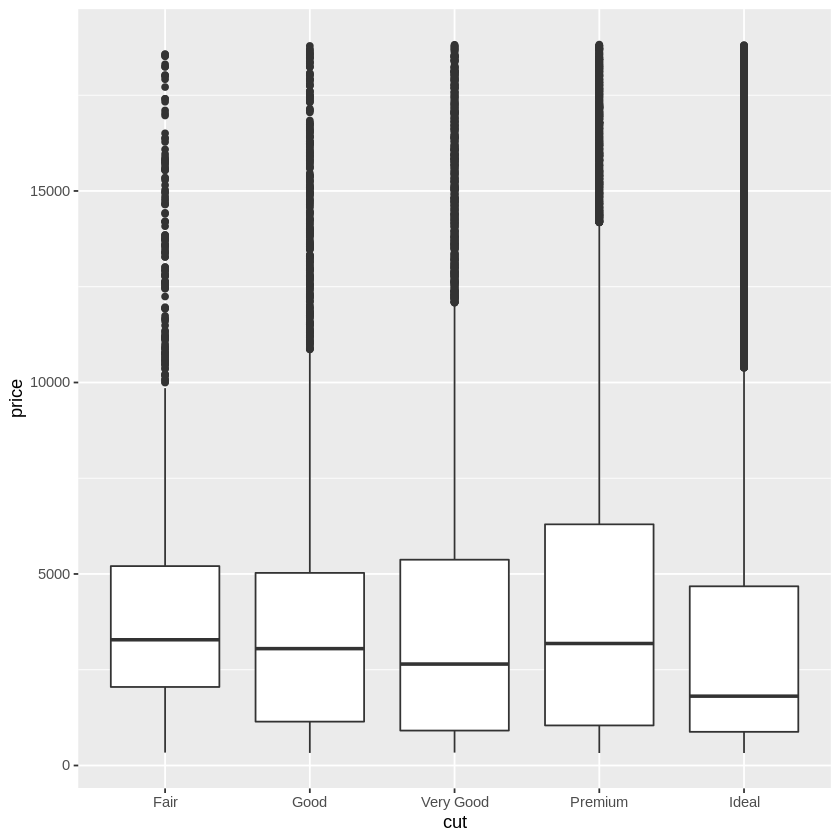

In [57]:
diamonds %>% ggplot(aes(cut, price)) + geom_boxplot()

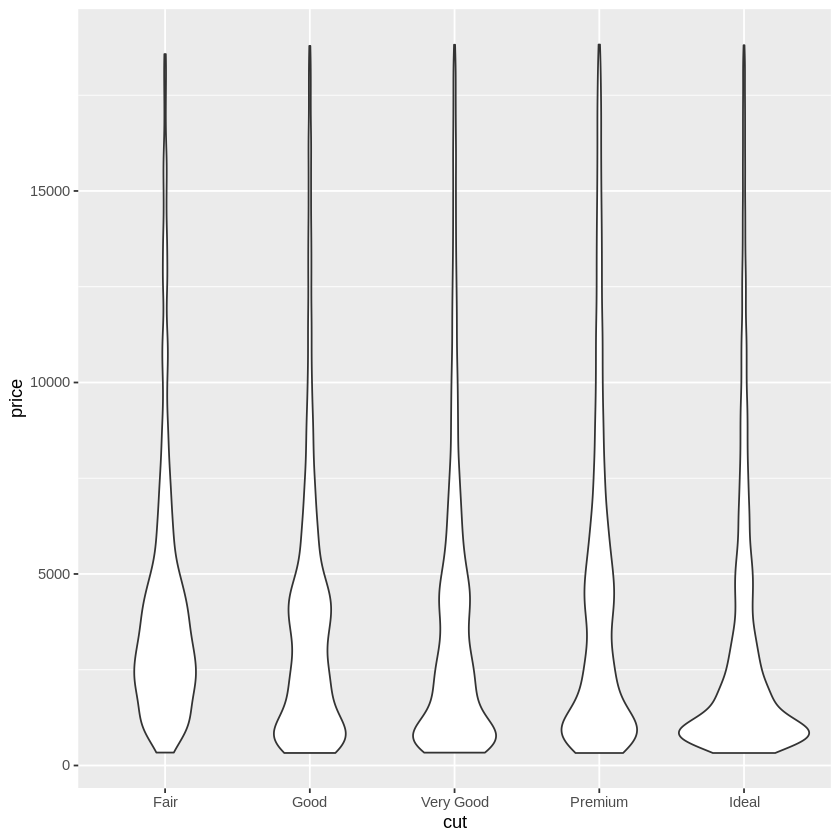

In [58]:
#이 데이터의 경우 density를 확인하기엔 바이올린 플롯이 더 좋아 보임.
diamonds %>% ggplot(aes(cut, price)) + geom_violin()